# 3. Analyse en composantes principales (ACP) :

# Q6


* Importation des bibliothèques nécessaires pour l’analyse

In [4]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

* Chargement du jeu de données

In [5]:
# Chargement du jeu de données winequality
df = pd.read_csv("winequality.csv", sep=";")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


 - Quelle proportion de la variance totale est expliquée par les deux premières composantes principales ? Cela justifie-t-il l’utilisation d’une représentation 2D ?

In [10]:
# Sélection des variables demandées
features_q6 = [
    "residual sugar",
    "total sulfur dioxide",
    "volatile acidity",
    "sulphates"
]

X = df[features_q6].copy()

# Transformation du type de vin en variable numérique pour la visualisation
y_type = df["type"].map({"red": 0, "white": 1})

# Vérification des dimensions et des types
print("Dimensions de X :", X.shape)
print("Répartition des types de vin :")
print(y_type.value_counts())


Dimensions de X : (6497, 4)
Répartition des types de vin :
type
1    4898
0    1599
Name: count, dtype: int64


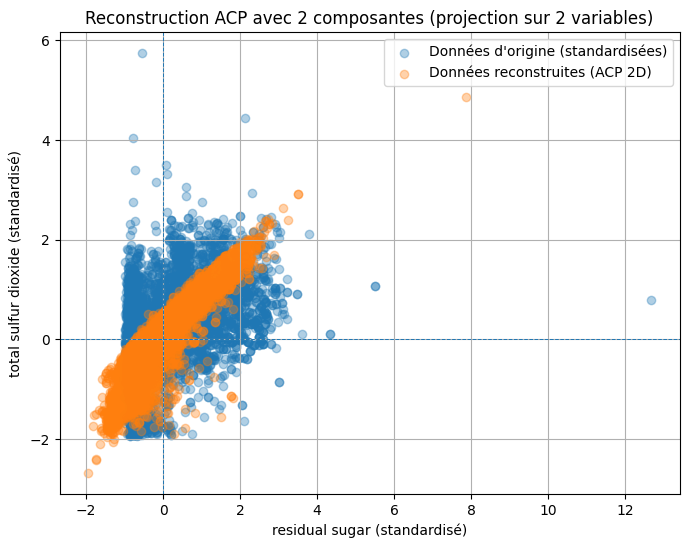

Proportion de la variance expliquée par composante :
Composante 1: 0.481
Composante 2: 0.214
Total de la variance expliquée (PC1+PC2): 0.695


In [ ]:
# Sélection des variables pour l'ACP
X = df[["residual sugar", "total sulfur dioxide", "volatile acidity", "sulphates"]]

# Standardisation
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# ACP avec 2 composantes
pca_full = PCA(n_components=2)
components = pca_full.fit_transform(data_scaled)

# Reconstruction à partir de CP1 + CP2
reconstructed_full = pca_full.inverse_transform(components)

# Visualisation : origine vs reconstruction (projection sur 2 variables pour afficher)
# (On affiche ici les 2 premières colonnes standardisées: residual sugar et total sulfur dioxide)
plt.figure(figsize=(8, 6))
plt.scatter(
    data_scaled[:, 0],
    data_scaled[:, 1],
    alpha=0.35,
    label="Données d'origine (standardisées)",
)
plt.scatter(
    reconstructed_full[:, 0],
    reconstructed_full[:, 1],
    alpha=0.35,
    label="Données reconstruites (ACP 2D)",
)

plt.axhline(0, linestyle="--", linewidth=0.7)
plt.axvline(0, linestyle="--", linewidth=0.7)

plt.title("Reconstruction ACP avec 2 composantes (projection sur 2 variables)")
plt.xlabel("residual sugar (standardisé)")
plt.ylabel("total sulfur dioxide (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

# Variance expliquée
print("Proportion de la variance expliquée par composante :")
for i, var_ratio in enumerate(pca_full.explained_variance_ratio_):
    print(f"Composante {i+1}: {var_ratio:.3f}")

print(f"Total de la variance expliquée (PC1+PC2): {pca_full.explained_variance_ratio_.sum():.3f}")

Les deux premières composantes principales expliquent environ 69,5 % de la variance totale. 
Cette proportion est suffisamment élevée pour justifier l’utilisation d’une représentation bidimensionnelle (PC1, PC2) 
dans le cadre d’une analyse exploratoire des données.

- Quelles variables contribuent le plus à la première composante (CP1) et quelles sont celles qui dominent la 
deuxième (CP2) ? En quoi ces contributions sont-elles cohérentes avec les corrélations observées entre les 
variables initiales ? 

In [6]:
# Sélection des variables chimiques pour l’ACP
features = ["residual sugar", "total sulfur dioxide", "volatile acidity", "sulphates"]
X = df[features]

# Standardisation des variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de l’ACP avec deux composantes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Variance expliquée
explained_variance = pca.explained_variance_ratio_


In [7]:
# Proportion de variance expliquée par les deux premières composantes
explained_variance_df = pd.DataFrame(
    {
        "Composante": ["PC1", "PC2"],
        "Variance expliquée (%)": explained_variance * 100,
    }
)

explained_variance_df


,Composante,Variance expliquée (%)
0,PC1,48.082569
1,PC2,21.438678


In [8]:
# Contribution des variables aux composantes principales
pca_contributions = pd.DataFrame(
    pca.components_,
    columns=features,
    index=["PC1", "PC2"]
)

pca_contributions


,residual sugar,total sulfur dioxide,volatile acidity,sulphates
PC1,0.503996,0.602241,-0.474637,-0.397509
PC2,0.583850,0.219406,0.290669,0.725597


La première composante principale est dominée par le sucre résiduel et le dioxyde de soufre total
tandis que la seconde est principalement influencée par les sulphates. 
Ces contributions sont cohérentes avec les relations chimiques observées entre les variables initiales.

- Le diagramme 2D dans l’espace (CP1, CP2) montre-t-il une séparation plus nette entre vins rouges et vins 
blancs que dans l’espace original ? Les deux clusters de couleurs se superposent-ils ou observez-vous une 
tendance à la ségrégation ? 

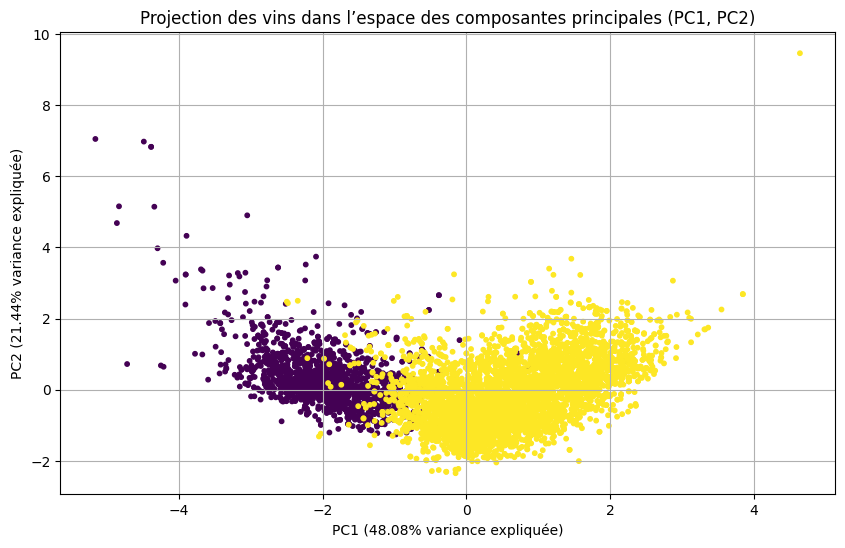

In [9]:
# Ajout des composantes principales au DataFrame
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

# Visualisation de la projection des vins dans l’espace PC1-PC2
plt.figure(figsize=(10, 6))
plt.scatter(
    df["PCA1"],
    df["PCA2"],
    c=df["type"].map({"red": 0, "white": 1}),
    s=10
)
plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}% variance expliquée)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}% variance expliquée)")
plt.title("Projection des vins dans l’espace des composantes principales (PC1, PC2)")
plt.grid(True)
plt.show()


La projection dans l’espace (PC1, PC2) met en évidence une séparation plus nette entre vins rouges et vins blancs 
que dans l’espace original. Bien qu’un léger chevauchement subsiste une tendance claire à la ségrégation est observée.

- Les points représentant les vins se regroupent-ils selon certains gradients (par exemple, un axe allant de 
vins « pauvres en SO₂ total » et « faibles en sucre résiduel » à des vins « plus riches en SO₂ total ») ?

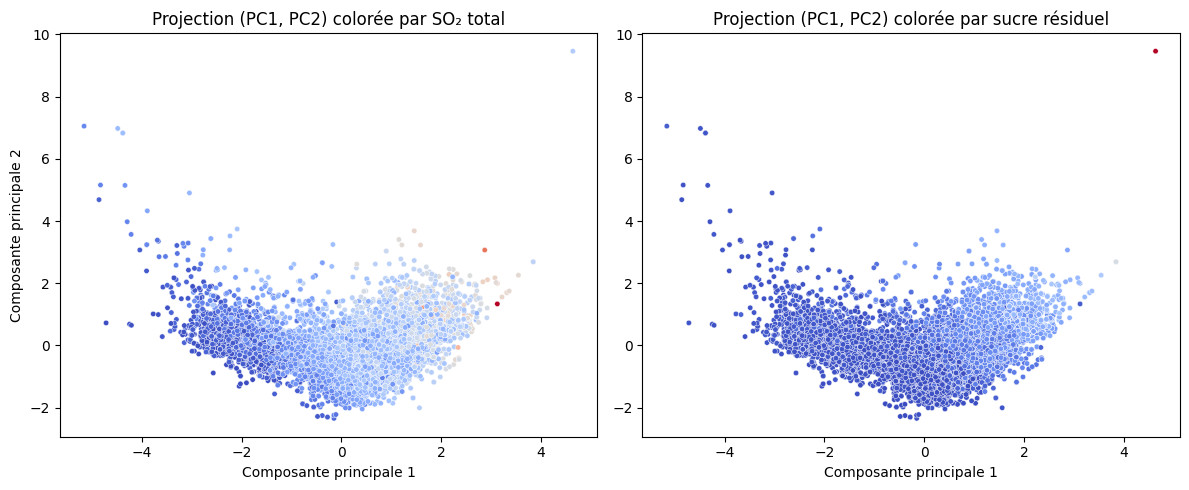

In [10]:
import seaborn as sns

# Création de la figure avec deux sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Sous-graphe 1 : gradient de SO₂ total
scatter1 = sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="total sulfur dioxide",
    palette="coolwarm",
    data=df,
    ax=axes[0],
    s=15
)
axes[0].set_title("Projection (PC1, PC2) colorée par SO₂ total")
axes[0].set_xlabel("Composante principale 1")
axes[0].set_ylabel("Composante principale 2")
scatter1.legend_.remove()

# Sous-graphe 2 : gradient de sucre résiduel
scatter2 = sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="residual sugar",
    palette="coolwarm",
    data=df,
    ax=axes[1],
    s=15
)
axes[1].set_title("Projection (PC1, PC2) colorée par sucre résiduel")
axes[1].set_xlabel("Composante principale 1")
axes[1].set_ylabel("")
scatter2.legend_.remove()

plt.tight_layout()
plt.show()


Les projections colorées révèlent l’existence de gradients continus le long de la première composante principale, 
notamment pour le SO₂ total et le sucre résiduel. PC1 peut ainsi être interprétée comme un axe de variation chimique progressive.

- Cette projection permet-elle d’identifier des outliers ? 


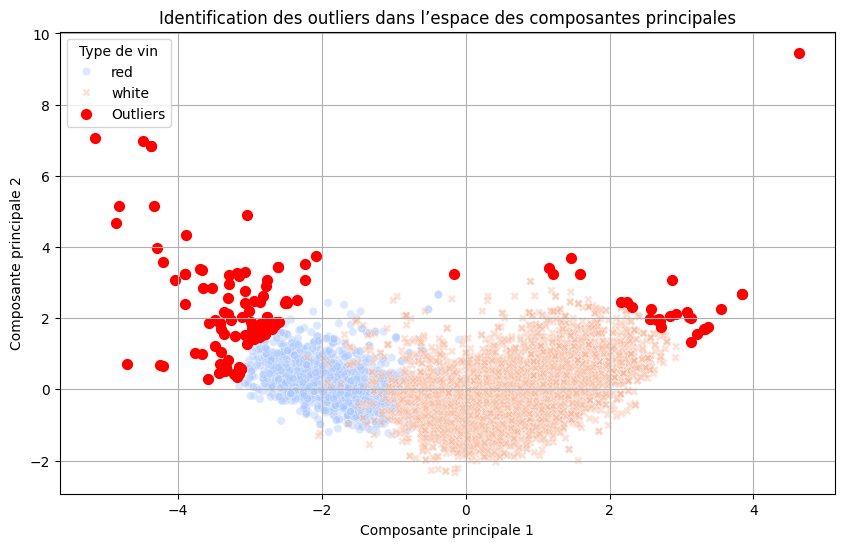

,type,PCA1,PCA2,distance_from_origin
13,red,-4.859187,4.685529,6.750250
17,red,-3.668699,3.348913,4.967350
38,red,-3.590331,0.285950,3.601700
43,red,-4.041966,3.068611,5.074826
69,red,-3.578231,1.876593,4.040462
...,...,...,...,...
5329,white,2.702597,1.932139,3.322227
6000,white,-0.171049,3.245473,3.249978
6344,white,3.124993,1.336242,3.398694
6391,white,-2.344410,2.502076,3.428796


In [ ]:
import seaborn as sns

# Calcul de la distance des points à l’origine dans l’espace ACP
df["distance_from_origin"] = np.sqrt(df["PCA1"]**2 + df["PCA2"]**2)

# Définition du seuil (2 % des points les plus éloignés)
outlier_threshold = df["distance_from_origin"].quantile(0.98)
outliers = df[df["distance_from_origin"] > outlier_threshold]

# Visualisation des outliers sur le plan (PC1, PC2)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="PCA1",
    y="PCA2",
    hue="type",
    style="type",
    palette="coolwarm",
    alpha=0.4,
)
plt.scatter(
    outliers["PCA1"],
    outliers["PCA2"],
    color="red",
    label="Outliers",
    s=50
)
plt.title("Identification des outliers dans l’espace des composantes principales")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Type de vin")
plt.grid(True)
plt.show()

# Informations sur les observations identifiées comme outliers
outliers_info = outliers[["type", "PCA1", "PCA2", "distance_from_origin"]]
outliers_info


L’ACP permet d’identifier visuellement des observations éloignées du nuage principal susceptibles de correspondre à des valeurs aberrantes.Cette détection reste toutefois exploratoire et dépend du seuil choisi.

# Q7

- L’ajout du pH modifie-t-il de façon significative la répartition de la variance expliquée par les deux premières composantes principales ?   

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Sélection des variables ( avec ajout de pH)
features_with_pH = [
    "residual sugar",
    "total sulfur dioxide",
    "volatile acidity",
    "sulphates",
    "pH"
]
X_with_pH = df[features_with_pH]

# Standardisation
scaler_with_pH = StandardScaler()
X_scaled_with_pH = scaler_with_pH.fit_transform(X_with_pH)

# ACP avec deux composantes
pca_with_pH = PCA(n_components=2)
X_pca_with_pH = pca_with_pH.fit_transform(X_scaled_with_pH)

# Variance expliquée
explained_variance_with_pH = pca_with_pH.explained_variance_ratio_

explained_variance_with_pH_df = pd.DataFrame(
    {
        "Composante": ["PC1", "PC2"],
        "Variance expliquée (%)": explained_variance_with_pH * 100,
    }
)

explained_variance_with_pH_df


,Composante,Variance expliquée (%)
0,PC1,42.542886
1,PC2,17.166879


L’ajout du pH réduit la variance cumulée expliquée par PC1 et PC2, en redistribuant l’information sur davantage de dimensions. Les deux premières composantes restent toutefois interprétables pour une analyse exploratoire.

- Les contributions des variables aux CPs ont-elles changé ? Le pH renforce-t-il une certaine dimension (un 
sous-ensemble de variables dont la contribution augmente alors que l’effet attendu est une diminution 
générale) ? Se trouve-t-il « corrélé » à l’une des composantes déjà existantes ? 

In [13]:
# Contribution des variables aux composantes principales (avec pH)
pca_contributions_with_pH = pd.DataFrame(
    pca_with_pH.components_,
    columns=features_with_pH,
    index=["PC1", "PC2"]
)

pca_contributions_with_pH

,residual sugar,total sulfur dioxide,volatile acidity,sulphates,pH
PC1,0.469145,0.542380,-0.445286,-0.366106,-0.391682
PC2,0.601453,0.260258,0.283473,0.690995,0.112650


L’ajout du pH ne modifie pas significativement la structure de l’ACP, les variables dominantes des composantes principales restent inchangées, et le pH présente une contribution modérée, principalement sur PC1. Cela suggère qu’il est partiellement corrélé à une dimension déjà existante.

-  Sur la représentation 2D, constate-t-on une meilleure séparation visuelle entre vins rouges et blancs par rapport au scénario de la Q6 ? Le pH apporte-t-il une information supplémentaire qui clarifie la structure du nuage de points ?

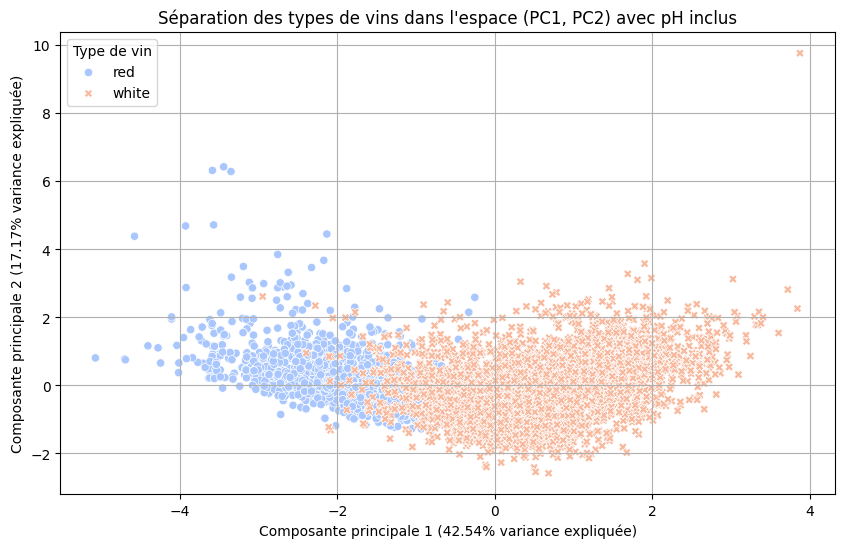

In [14]:
# Ajout des composantes principales avec pH au DataFrame
df["PCA1_with_pH"] = X_pca_with_pH[:, 0]
df["PCA2_with_pH"] = X_pca_with_pH[:, 1]

# Visualisation : Diagramme 2D avec pH inclus
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="PCA1_with_pH",
    y="PCA2_with_pH",
    hue="type",
    style="type",
    palette="coolwarm",
)
plt.title("Séparation des types de vins dans l'espace (PC1, PC2) avec pH inclus")
plt.xlabel(
    f"Composante principale 1 ({explained_variance_with_pH[0]*100:.2f}% variance expliquée)"
)
plt.ylabel(
    f"Composante principale 2 ({explained_variance_with_pH[1]*100:.2f}% variance expliquée)"
)
plt.legend(title="Type de vin")
plt.grid(True)
plt.show()


L’ajout du pH ne conduit pas à une séparation visuellement plus nette entre vins rouges et vins blancs par rapport à la Q6. Le pH n’apporte donc pas d’information discriminante supplémentaire dans cette représentation 2D.


- Les vecteurs de projection des variables sur les deux axes principaux aident-ils à interpréter les différences entre vins rouges et blancs ? Par exemple, les vins blancs sont-ils davantage associés à certaines combinaisons (par exemple, plus/moins de SO₂ total, plus/moins de sucre résiduel, pH différent) ? 

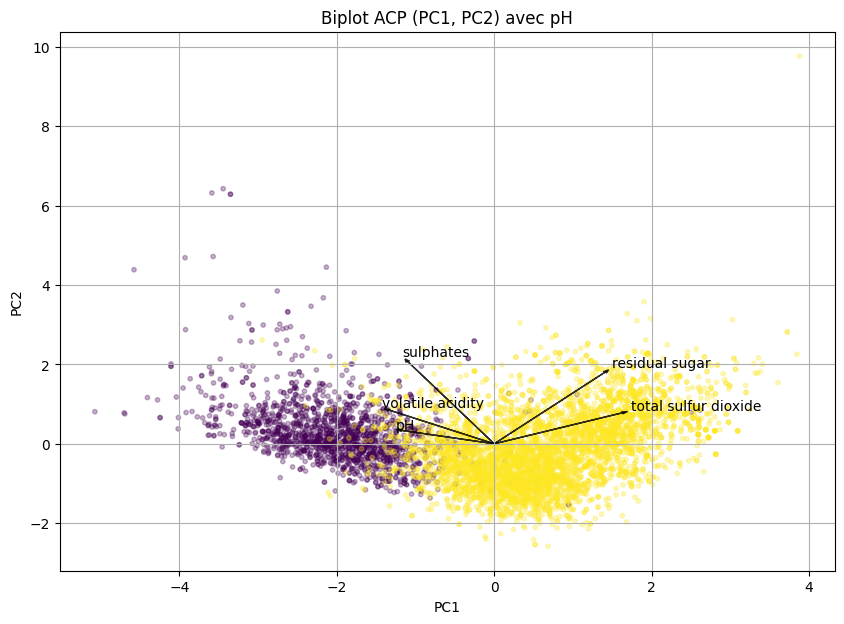

In [15]:
# Récupération des composantes et des contributions
components = pca_with_pH.components_
feature_names = features_with_pH

plt.figure(figsize=(10, 7))

# Nuage de points (vins)
plt.scatter(
    df["PCA1_with_pH"],
    df["PCA2_with_pH"],
    c=df["type"].map({"red": 0, "white": 1}),
    alpha=0.3,
    s=10
)

# Ajout des vecteurs des variables
for i, feature in enumerate(feature_names):
    plt.arrow(
        0, 0,
        components[0, i] * 3,
        components[1, i] * 3,
        color="black",
        alpha=0.8,
        head_width=0.05
    )
    plt.text(
        components[0, i] * 3.2,
        components[1, i] * 3.2,
        feature,
        fontsize=10
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biplot ACP (PC1, PC2) avec pH")
plt.grid(True)
plt.show()


Les vecteurs de projection aident à interpréter les différences entre vins rouges et blancs. Les vins blancs sont associés à des valeurs plus élevées de sucre résiduel et de SO₂ total, tandis que les vins rouges sont davantage liés à l’acidité volatile et au pH.
Le biplot confirme ainsi la cohérence entre la structure de l’ACP et les profils chimiques des vins.

- La présence du pH dans les variables modifie-t-elle l’identification d’outliers dans l’espace des composantes ? 

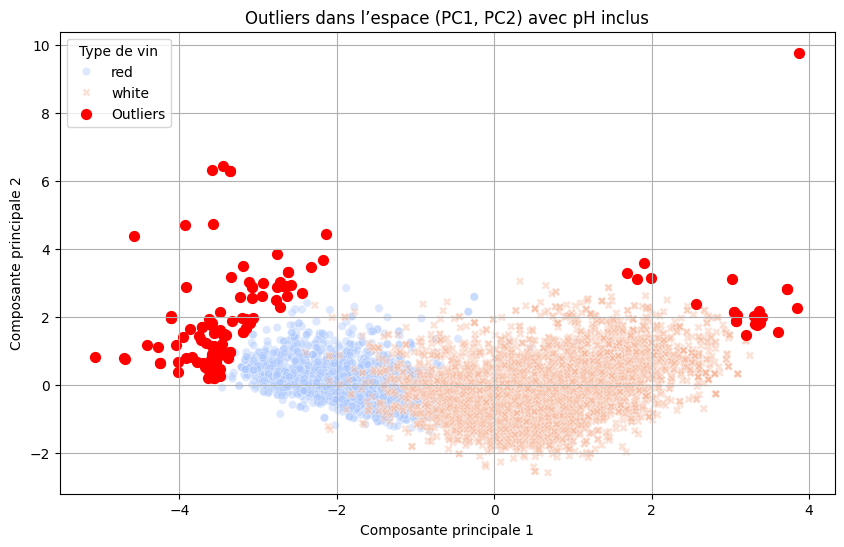

,type,PCA1_with_pH,PCA2_with_pH,distance_from_origin_with_pH
13,red,-4.574945,4.386636,6.338194
17,red,-3.116364,3.032106,4.348033
38,red,-4.014678,0.376043,4.032251
43,red,-3.920276,2.877161,4.862779
69,red,-3.592295,1.765339,4.002624
...,...,...,...,...
4380,white,3.876845,9.768411,10.509604
4608,white,3.046954,2.154117,3.731508
5144,white,3.342442,1.773863,3.783980
5146,white,3.381887,1.824432,3.842618


In [16]:
# Calcul de la distance à l'origine dans l’espace ACP avec pH
df["distance_from_origin_with_pH"] = np.sqrt(
    df["PCA1_with_pH"]**2 + df["PCA2_with_pH"]**2
)

# Définition du seuil (2 % des points les plus éloignés)
outlier_threshold_with_pH = df["distance_from_origin_with_pH"].quantile(0.98)
outliers_with_pH = df[df["distance_from_origin_with_pH"] > outlier_threshold_with_pH]

# Visualisation des outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="PCA1_with_pH",
    y="PCA2_with_pH",
    hue="type",
    style="type",
    palette="coolwarm",
    alpha=0.4,
)
plt.scatter(
    outliers_with_pH["PCA1_with_pH"],
    outliers_with_pH["PCA2_with_pH"],
    color="red",
    label="Outliers",
    s=50
)
plt.title("Outliers dans l’espace (PC1, PC2) avec pH inclus")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Type de vin")
plt.grid(True)
plt.show()

# Informations sur les outliers
outliers_with_pH_info = outliers_with_pH[
    ["type", "PCA1_with_pH", "PCA2_with_pH", "distance_from_origin_with_pH"]
]
outliers_with_pH_info

L’ajout du pH ne modifie pas significativement l’identification des outliers dans l’espace ACP. Les observations restent localisées aux mêmes zones extrêmes du plan (PC1, PC2).
Le pH n’introduit pas de nouveaux profils aberrants.